# Moving Average Convergence Divergence (MACD)

Moving Average Convergence Divergence (MACD) is a trend indicator. MACD fast line is usually 12-period moving average while MACD slow line is usually 26-period moving average. The difference between the MACD fast and slow lines is the signal line. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,99.499107,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.005730,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.107361,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.093399,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,91.575073,70798000


In [3]:
import talib as ta

In [4]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist
Date,,,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200,-10.368121,-9.225511,-1.142611
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500,-9.986672,-9.377743,-0.608929
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100,-9.655028,-9.433200,-0.221828
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400,-9.278809,-9.402322,0.123513
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500,-8.758367,-9.273531,0.515163


In [6]:
df = df.dropna()

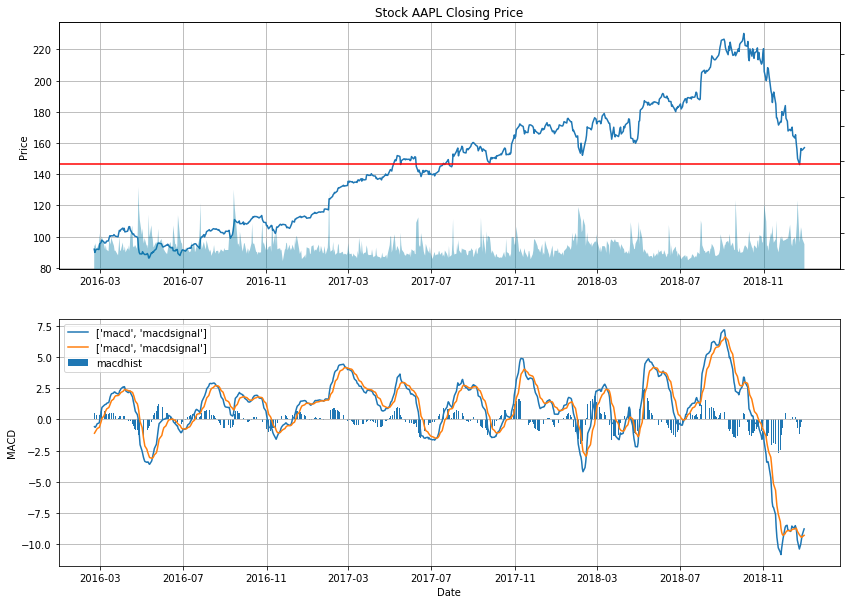

In [7]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

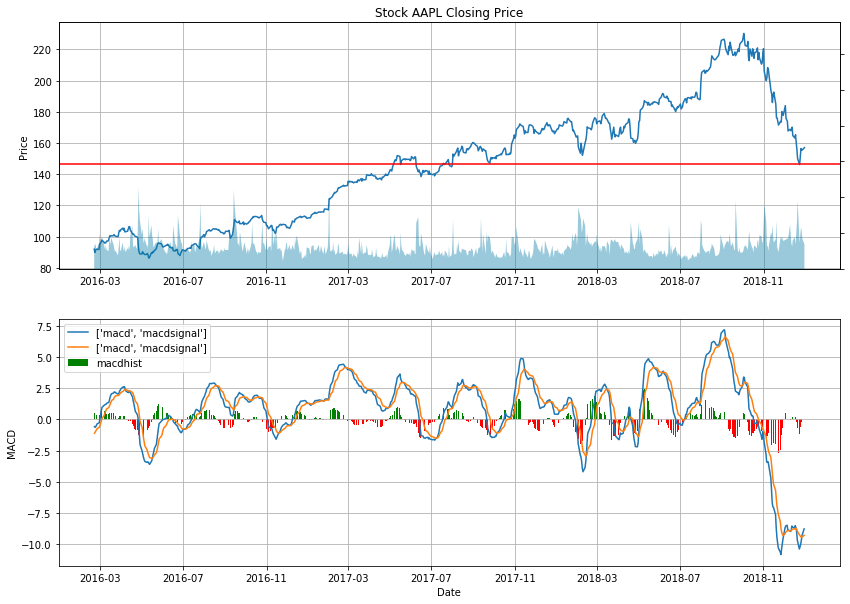

In [8]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with MACD

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['macd'], dfc['macdsignal'], dfc['macdhist'] = ta.MACD(dfc['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,positive,VolumePositive
0,736062.0,108.910004,109.769997,108.169998,108.660004,103.182144,23581700,2.784154,3.152633,-0.368478,False,False
1,736065.0,108.970001,110.610001,108.830002,109.019997,103.523987,29407500,2.618614,3.045829,-0.427215,False,False
2,736066.0,109.339996,110.500000,108.660004,110.440002,104.872406,27232300,2.566642,2.949992,-0.383349,False,False
3,736067.0,110.800003,112.339996,110.800003,112.040001,106.391754,33257300,2.617876,2.883568,-0.265693,False,False
4,736068.0,111.620003,112.389999,111.330002,112.099998,106.448715,25473900,2.632726,2.833400,-0.200674,False,False


In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
ax1v.fill_between(dfc.Date, 0, dfc.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_xlabel('Date')
ax2.legend(loc='best')

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

In [ ]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(3, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.bar(dfc.Date, dfc['Volume'], color=dfc.VolumePositive.map({True: 'g', False: 'r'}))
ax3.grid()
ax3.set_ylabel('Volume')
ax3.set_xlabel('Date')